In [6]:

from solution import Solution
from basis import Basis
import itertools
import numpy as np


# SET ACCURATE PHI


eps = 0.1
power = 4

params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
phi = Solution(**params)
# phi.solve(verbose = True, **iteration_phi_dict)


params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
rho = Solution(**params)



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            ])

def H(phi):
    return (phi**2)/2

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: -u_bas([1,0])-eps*u_bas([0,2])+H(u_loc([0,1]))]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 100
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]
border_right_operators = [lambda u, _, x, x_loc: x[1]*(1-x[1]) #+ int(x[0]==0) * initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_ops = [border_left_operators, border_right_operators]

points = (colloc_points, connect_points, border_points)
                            
# connect_ops = [connect_left_operators, connect_right_operators]

iteration_phi_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}


In [18]:
power = 5

def dir(point: np.array) -> np.array:
            direction = (np.abs(point) == 1) * (np.sign(point)) 
            return np.array(direction, dtype=int)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

border_points = np.array([[-1, 0.5], #[1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], #[1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

w = (rho.steps[0]/2)

def H_q(phi):
    return phi

def H_q_x(phi):
    return 1


# colloc_left_rho_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) - H_q(phi(x))*u_bas([0,1]) - H_q_x(phi(x)) * phi_x(x)*u_bas([0,0])) * w*2]
# colloc_rho_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
# colloc_rho_ops = [colloc_left_rho_operators, colloc_rho_right_operators]


border_weight = 100
border_left_rho_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def initial_state(point):
    t, x = point
    return x*x*(1-x)


border_right_rho_operators = [lambda u, _, x, x_loc: 0 + int(x[0]==0) * initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_rho_ops = [border_left_rho_operators, border_right_rho_operators]

points = (colloc_points, connect_points, border_points)

connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)) + np.sum(dir(x_loc)) * u_bas(dir(x_loc)) * w,
                        lambda _, u_bas, x, x_loc: u_bas(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_bas(3*dir(x_loc))* w**3
                        ]
connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)) + np.sum(dir(x_loc))*u_nei(dir(x_loc))* w,
                            lambda _, u_nei, x, x_loc: u_nei(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_nei(3*dir(x_loc))* w**3
                            ]

# connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)),
                        # lambda _, u_bas, x, x_loc: u_bas(dir(x_loc))* w
                        
# connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)),
                            # lambda _, u_nei, x, x_loc: u_nei(dir(x_loc))* w
                            # ]
                            
connect_ops = [connect_left_operators, connect_right_operators]

def iterate_rho(phi):
    colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) - H_q(phi.eval(x,[0,0]))*u_bas([0,1]) - H_q_x(phi.eval(x,[0,1])) * phi.eval(x,[0,2])*u_bas([0,0])) * w*2]
    colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
    colloc_rho_ops = [colloc_left_operators, colloc_right_operators]

    iteration_rho_dict = {'points':points,
            'colloc_ops':colloc_rho_ops,
            'border_ops':border_rho_ops,
            'connect_ops':connect_ops}

    rho.solve(verbose = True, **iteration_rho_dict)

In [19]:
phi.solve(verbose = True, **iteration_phi_dict)
iterate_rho(phi)

4.8082051578093865e-12
Iterations to converge:  0
0.06231785494532546
0.03929546533424057
0.023739456141209134
0.014386593192448277
0.009173567718102592
0.0047877582676359685
0.002084423385101196
0.0010242160628208472
0.0004986148814340642
0.00023335899966571254
0.0001484556029683606
7.606493062627985e-05
3.0914416961784486e-05
1.3605309407175854e-05
7.62776398932917e-06
4.561755453971663e-06
2.2609246866753425e-06
9.605351566525444e-07
5.594153132193816e-07
3.4915527930912474e-07
1.8560699916771173e-07
7.823919190687659e-08
3.7346960719960784e-08
2.2996707683964335e-08
1.1879498070140049e-08
4.60874537318301e-09
2.134856085748288e-09
1.3109194728008755e-09
6.247104092707567e-10
2.379117391374669e-10
1.1939133882921116e-10
6.814630023471713e-11
Iterations to converge:  31


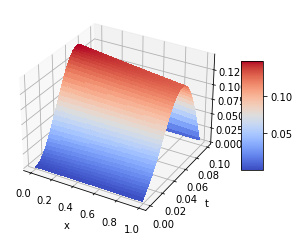

In [20]:
rho.plot2d()

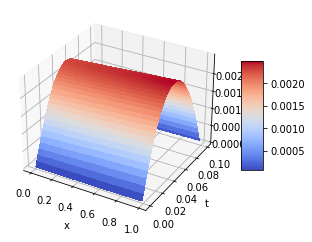

In [21]:
phi.plot2d()

In [24]:
a = phi

n = 40
func = np.zeros((n,n))
x_lims = a.area_lims[0]
y_lims = a.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[i, j] = a.eval([ax1[i], ax2[j]], [0,0])


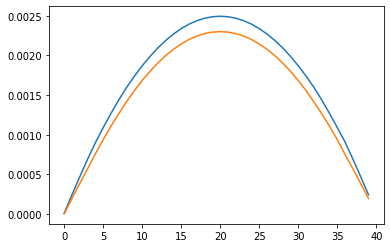

In [25]:
import matplotlib.pyplot as plt
plt.plot(func[-1])
plt.plot(func[0])